In [1]:
import EOSgenerators.crust_EOS as crust
import EOSgenerators.RMF_EOS as RMF
import EOSgenerators.Polytrope_EOS as Polytrope
import EOSgenerators.Strangeon_EOS as Strangeon
import TOVsolver.main as main
import matplotlib.pyplot as plt
import numpy as np
import math
from TOVsolver.unit import g_cm_3,dyn_cm_2,km,Msun,MeV,fm

In [3]:
DM=np.loadtxt("FM_DM_0.5.dat")

In [5]:
print(DM)

[[1.00000000e-11 6.24500451e-17 5.00000011e-09]
 [1.50000000e-11 1.24900090e-16 7.50000022e-09]
 [2.00000000e-11 2.15105711e-16 9.99997471e-09]
 ...
 [9.98000000e+00 2.92092378e+03 1.11114845e+04]
 [9.99000000e+00 2.92501872e+03 1.11255471e+04]
 [1.00000000e+01 2.92911519e+03 1.11396138e+04]]


In [7]:
MeVfm3_to_gmcm3 = 1.7827e12
MeVfm3_to_dyncm2 = 1.6022e33

In [9]:
eps=DM[:,2] * MeVfm3_to_gmcm3
pres=DM[:,1] * MeVfm3_to_dyncm2

In [11]:
print(eps)
print(pres)

[8.91350020e+03 1.33702504e+04 1.78269549e+04 ... 1.98084435e+16
 1.98335129e+16 1.98585895e+16]
[1.00057462e+17 2.00114925e+17 3.44642370e+17 ... 4.67990408e+36
 4.68646499e+36 4.69302836e+36]


In [13]:
eps_unit = eps * g_cm_3
pres_unit = pres * dyn_cm_2

In [15]:
print(eps_unit)

[2.54088012e-11 3.81132021e-11 5.08174727e-11 ... 5.64658991e+01
 5.65373618e+01 5.66088453e+01]


In [17]:
print(pres_unit)

[3.16915055e-19 6.33830111e-19 1.09159630e-18 ... 1.48228031e+01
 1.48435836e+01 1.48643720e+01]


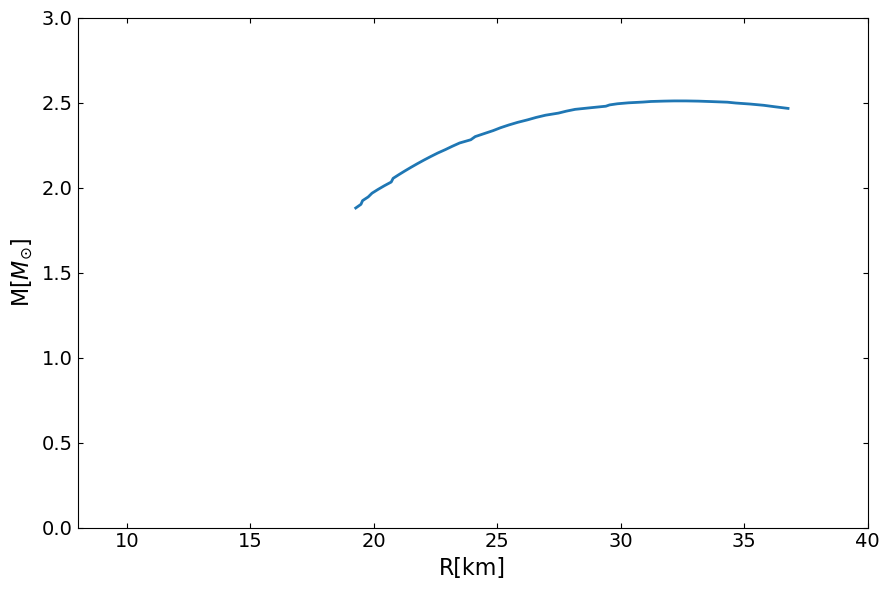

In [21]:
MR = main.OutputMR("",eps_unit,pres_unit).T

fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(MR[1]/km,MR[0]/Msun,lw=2)
ax.set_ylabel(r"M[$M_{\odot}$]", fontsize=16)
ax.set_xlabel("R[km]", fontsize=16)
ax.set_ylim(0,3)
ax.set_xlim(8.0,40.0)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
fig.tight_layout()
plt.show()

In [25]:
MRT = main.OutputMRT("",eps_unit,pres_unit).T

C:\Users\User\anaconda3\Lib\site-packages\TOVsolver\solver_code.py:115: RuntimeWarning: overflow encountered in scalar power
  * (5.0 * eps + 9.0 * pres + (eps + pres) ** 2.0 / (pres * ad_index))
C:\Users\User\anaconda3\Lib\site-packages\TOVsolver\solver_code.py:107: RuntimeWarning: overflow encountered in scalar multiply
  dpdr = -(eps + pres) * (m + 4.0 * pi * r**3.0 * pres)
C:\Users\User\anaconda3\Lib\site-packages\TOVsolver\solver_code.py:120: RuntimeWarning: overflow encountered in scalar multiply
  ) + 2.0 * b / r * np.power(1.0 - 2.0 * y[1] / r, -1) * (
C:\Users\User\anaconda3\Lib\site-packages\TOVsolver\solver_code.py:112: RuntimeWarning: invalid value encountered in scalar add
  dfdr = 2.0 * np.power(1.0 - 2.0 * m / r, -1) * h * (


In [45]:
print(MRT[2])

[3587.63779933 3178.28995689 2820.86882748 2517.94270553 2242.78600717
 2008.56255965 1795.75007428 1613.87454607 1448.50220121 1306.59890474
 1180.76288583 1069.07880725  969.82513121  881.52784014  802.88500697
  734.32688684  671.52785974  616.58415487  567.2597764   522.92133843
  483.03756651  447.13421836  415.39176455  386.67103395  360.67718816
  337.14544909  315.81384561  296.47629161  279.22411761  263.54420014
  249.28612535  236.51965953  224.89406749  214.30743095  204.66393391
  196.046547    188.19450913  181.18999929  174.83001603  169.07796398
  163.89117033  159.38458182  155.2852805   151.71410329  148.64676511
  145.96373395  143.67450479  141.86499136  140.39846072  139.28165607]


<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
C:\Users\User\AppData\Local\Temp\ipykernel_1476\710564479.py:4: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("M[$M_{\odot}$]", fontsize=16)


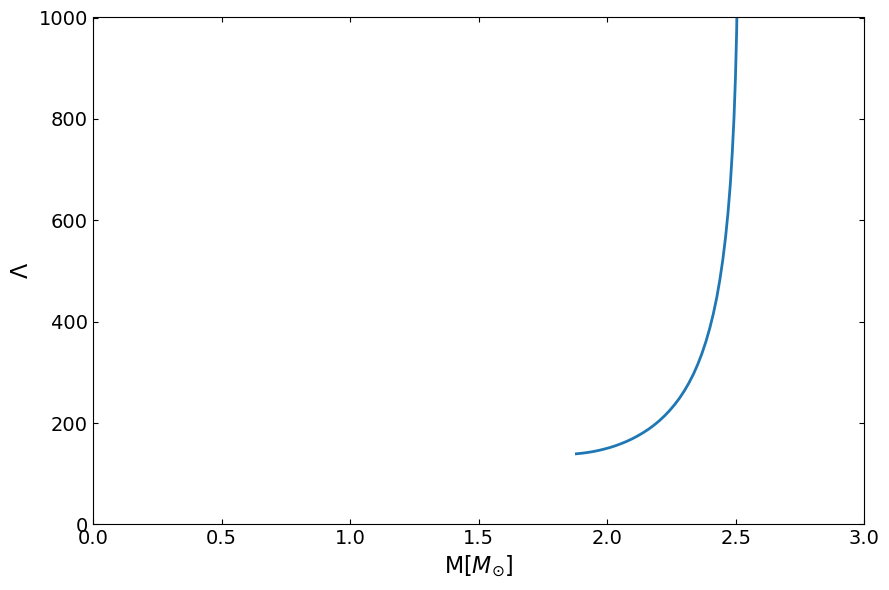

In [27]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(MRT[1]/Msun,MRT[2],lw=2)
ax.set_ylabel(r"$\Lambda$", fontsize=16)
ax.set_xlabel("M[$M_{\odot}$]", fontsize=16)
ax.set_ylim(0,1000)
ax.set_xlim(0,3)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
fig.tight_layout()
plt.show()

In [31]:
G = 6.67e-8
c = 3e10
k =(MRT[1]/Msun)*2* 10**33 
l = (G**4)*(k**5)*MRT[2]/(c**10)
k2=1.5*G*l / ((MR[1]/km)*1e5)**5
C = (0.666 * k2 /MRT[2])**(1/5) 

In [39]:
print(k2)

[0.05214064826318431 0.050729326686557843 0.048724515666774035
 0.04761175850429537 0.04674471302731748 0.04438637718207087
 0.04418862912669387 0.04297857913792992 0.04169030043423107
 0.04052655592330917 0.03893604289735639 0.038237754415009664
 0.03628988434380293 0.035980933832764996 0.034910621671449114
 0.03322153710184065 0.030688981654690858 0.03069495667764244
 0.03099417764751141 0.029811670167685385 0.028488878348424455
 0.028309832467412144 0.02749666374617197 0.026524834064082087
 0.025914126836863685 0.02514789123111806 0.024338585819446635
 0.023377696034016206 0.022815574797483775 0.02234747871785492
 0.021071580242502656 0.02108981452520229 0.020474579129343962
 0.01984823072198477 0.019386741877406712 0.018872820502295613
 0.01837086714834705 0.017890766616030066 0.01742560784120859
 0.016978320666129216 0.016546562817316392 0.016143990321152907
 0.015192155669614255 0.015046896143223566 0.014876838277810207
 0.014676411003764458 0.014197834750109087 0.014044572700433

<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
C:\Users\User\AppData\Local\Temp\ipykernel_1476\825645566.py:4: SyntaxWarning: invalid escape sequence '\o'
  ax.set_xlabel("M[$M_{\odot}$]", fontsize=16)


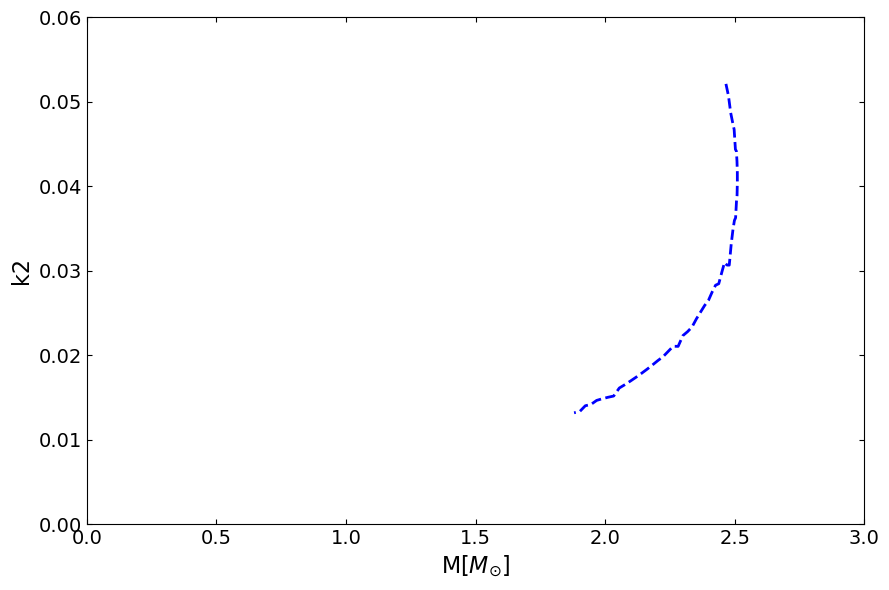

In [43]:
fig,ax = plt.subplots(1,1,figsize=(9,6))
ax.plot(MRT[1]/Msun,k2,'b--',lw=2)
ax.set_ylabel(r"k2", fontsize=16)
ax.set_xlabel("M[$M_{\odot}$]", fontsize=16)
ax.set_ylim(0.00,0.06)
ax.set_xlim(0,3)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
ax.tick_params(top=1,right=1,which="both",direction="in",labelsize=14)
fig.tight_layout()
plt.show()